In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from datetime import datetime

from utility import *

In [42]:
LOOKBACK = 61
TRAIN_SPLIT_RATIO = 0.9
columns = [CLOSE_INDEX]

In [43]:
todays_date = datetime.now().strftime('%Y-%m-%d')
download_monthly_klines('spot', [BTC], ['15m'], '2019-01-01', todays_date, 'train')

Found 1 symbols
[1/1] - start download monthly BTCUSDT klines 

file already exists! d:\ML\ML project\Cryptocurrency-Price-Forecasting\train\BTCUSDT\BTCUSDT-15m-2019-01.zip

file already exists! d:\ML\ML project\Cryptocurrency-Price-Forecasting\train\BTCUSDT\BTCUSDT-15m-2019-02.zip

file already exists! d:\ML\ML project\Cryptocurrency-Price-Forecasting\train\BTCUSDT\BTCUSDT-15m-2019-03.zip

file already exists! d:\ML\ML project\Cryptocurrency-Price-Forecasting\train\BTCUSDT\BTCUSDT-15m-2019-04.zip

file already exists! d:\ML\ML project\Cryptocurrency-Price-Forecasting\train\BTCUSDT\BTCUSDT-15m-2019-05.zip

file already exists! d:\ML\ML project\Cryptocurrency-Price-Forecasting\train\BTCUSDT\BTCUSDT-15m-2019-06.zip

file already exists! d:\ML\ML project\Cryptocurrency-Price-Forecasting\train\BTCUSDT\BTCUSDT-15m-2019-07.zip

file already exists! d:\ML\ML project\Cryptocurrency-Price-Forecasting\train\BTCUSDT\BTCUSDT-15m-2019-08.zip

file already exists! d:\ML\ML project\Cryptocurrency-Pri

In [44]:
dataframe = get_data('train', BTC)

train\BTCUSDT\BTCUSDT-15m-2019-01.csv
train\BTCUSDT\BTCUSDT-15m-2019-02.csv
train\BTCUSDT\BTCUSDT-15m-2019-03.csv
train\BTCUSDT\BTCUSDT-15m-2019-04.csv
train\BTCUSDT\BTCUSDT-15m-2019-05.csv
train\BTCUSDT\BTCUSDT-15m-2019-06.csv
train\BTCUSDT\BTCUSDT-15m-2019-07.csv
train\BTCUSDT\BTCUSDT-15m-2019-08.csv
train\BTCUSDT\BTCUSDT-15m-2019-09.csv
train\BTCUSDT\BTCUSDT-15m-2019-10.csv
train\BTCUSDT\BTCUSDT-15m-2019-11.csv
train\BTCUSDT\BTCUSDT-15m-2019-12.csv
train\BTCUSDT\BTCUSDT-15m-2020-01.csv
train\BTCUSDT\BTCUSDT-15m-2020-02.csv
train\BTCUSDT\BTCUSDT-15m-2020-03.csv
train\BTCUSDT\BTCUSDT-15m-2020-04.csv
train\BTCUSDT\BTCUSDT-15m-2020-05.csv
train\BTCUSDT\BTCUSDT-15m-2020-06.csv
train\BTCUSDT\BTCUSDT-15m-2020-07.csv
train\BTCUSDT\BTCUSDT-15m-2020-08.csv
train\BTCUSDT\BTCUSDT-15m-2020-09.csv
train\BTCUSDT\BTCUSDT-15m-2020-10.csv
train\BTCUSDT\BTCUSDT-15m-2020-11.csv
train\BTCUSDT\BTCUSDT-15m-2020-12.csv
train\BTCUSDT\BTCUSDT-15m-2021-01.csv
train\BTCUSDT\BTCUSDT-15m-2021-02.csv
train\BTCUSD

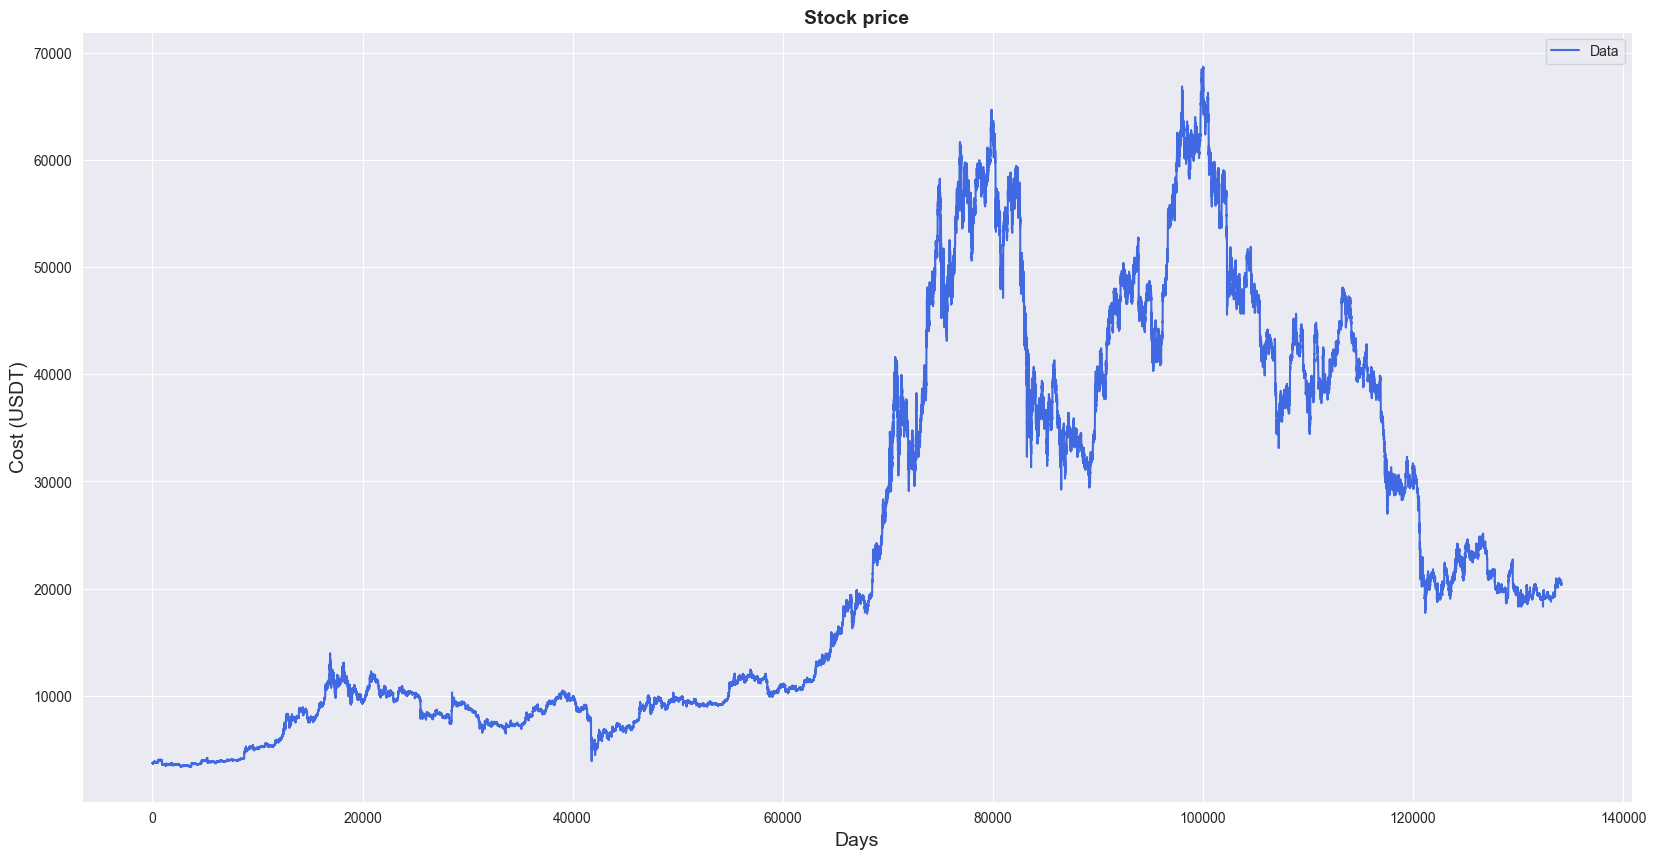

In [45]:
dataframe = dataframe[dataframe[IGNORE_INDEX] == 0]
plot_graph(pd.DataFrame(dataframe[CLOSE_INDEX].values))

In [48]:
df1 = dataframe[columns]
df1['Time'] = np.arange(len(dataframe.index))



C:\Users\chsub\AppData\Local\Temp\ipykernel_260\2317772463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Time'] = np.arange(len(dataframe.index))


In [49]:
X = df1.loc[:, ['Time']]
y = df1.loc[:, CLOSE_INDEX]

In [50]:
linear_model = LinearRegression()
linear_model.fit(X, y)

y_pred = pd.Series(linear_model.predict(X), index=X.index)

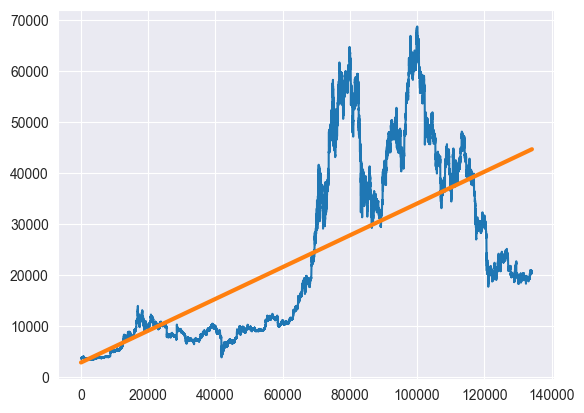

In [51]:
ax = y.plot()
ax = y_pred.plot(ax=ax, linewidth=3)

In [71]:

Lag = dataframe[CLOSE_INDEX].shift(1)
df1['Lag'] = Lag

C:\Users\chsub\AppData\Local\Temp\ipykernel_260\2992497462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Lag'] = Lag


In [72]:
X = df1.loc[:, ['Lag']]
X.dropna(inplace=True)
y =df1.loc[:, CLOSE_INDEX]
y,X = y.align(X, join='inner')



In [73]:
linear_model = LinearRegression()
linear_model.fit(X,y)
y_pred = pd.Series(linear_model.predict(X), index=X.index)

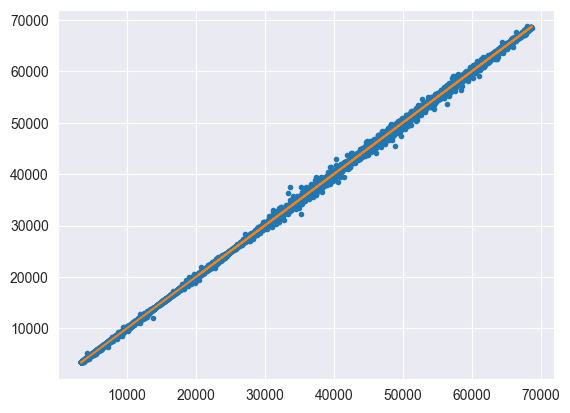

In [74]:
fig,ax = plt.subplots()
ax.plot(X['Lag'],y,'.')
ax.plot(X['Lag'], y_pred)

